In [743]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [744]:
# read in all the words

words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [745]:
# build the vocabulary of characters and mappings to integers

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [746]:
# build the dataset

block_size = 3 # context length:how many characters do we take to predict the next one
X, Y = [], []

for w in words:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)
    

emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn
abigail
emily
elizabeth
mila
ella
avery
sofia
camila
aria
scarlett
victoria
madison
luna
grace
chloe
penelope
layla
riley
zoey
nora
lily
eleanor
hannah
lillian
addison
aubrey
ellie
stella
natalie
zoe
leah
hazel
violet
aurora
savannah
audrey
brooklyn
bella
claire
skylar
lucy
paisley
everly
anna
caroline
nova
genesis
emilia
kennedy
samantha
maya
willow
kinsley
naomi
aaliyah
elena
sarah
ariana
allison
gabriella
alice
madelyn
cora
ruby
eva
serenity
autumn
adeline
hailey
gianna
valentina
isla
eliana
quinn
nevaeh
ivy
sadie
piper
lydia
alexa
josephine
emery
julia
delilah
arianna
vivian
kaylee
sophie
brielle
madeline
peyton
rylee
clara
hadley
melanie
mackenzie
reagan
adalynn
liliana
aubree
jade
katherine
isabelle
natalia
raelynn
maria
athena
ximena
arya
leilani
taylor
faith
rose
kylie
alexandra
mary
margaret
lyla
ashley
amaya
eliza
brianna
bailey
andrea
khloe
jasmine
melody
iris
isabel
norah
annabelle
valeria
emerson
adalyn
ryl

In [747]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [748]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [749]:
C = torch.randn((27, 2))

In [750]:
C

tensor([[ 0.2248,  0.3306],
        [-0.2099, -0.0828],
        [ 0.7007,  0.5403],
        [-0.7678, -0.6084],
        [ 0.9781,  1.4116],
        [ 1.0245, -0.6424],
        [-1.2232, -0.7419],
        [-0.3002,  1.2580],
        [-0.7401, -1.1830],
        [-1.5748, -1.0182],
        [-0.1884,  0.6641],
        [ 0.1857, -0.2541],
        [-0.5867,  0.2671],
        [-0.2527,  1.6275],
        [ 2.1837, -1.1390],
        [-0.0481, -0.6138],
        [-0.2395,  0.5115],
        [ 0.9723,  2.2598],
        [ 0.4398, -0.2482],
        [ 0.5835,  1.4351],
        [ 0.0684, -0.0994],
        [-0.2760,  0.0853],
        [ 0.0203,  1.5632],
        [-0.0436,  0.4320],
        [-0.7323,  0.4869],
        [ 1.2542,  0.1860],
        [ 0.5596, -1.7054]])

In [751]:
C[5]

tensor([ 1.0245, -0.6424])

In [752]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 1.0245, -0.6424])

In [753]:
C[X].shape

torch.Size([228146, 3, 2])

In [754]:
embed = C[X]
embed.shape

torch.Size([228146, 3, 2])

In [755]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [756]:
torch.cat(torch.unbind(embed, 1),1).shape

torch.Size([228146, 6])

In [757]:
h = torch.tanh(embed.view(-1, 6) @ W1 + b1)

In [758]:
h.shape

torch.Size([228146, 100])

In [759]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [760]:
logits = h @ W2 + b2

In [761]:
logits.shape

torch.Size([228146, 27])

In [762]:
counts = logits.exp()

In [763]:
prob = counts / counts.sum(1, keepdim=True)

In [764]:
prob.shape

torch.Size([228146, 27])

In [765]:
prob[0].sum()

tensor(1.)

In [766]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [767]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [768]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn(30, 200, generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [769]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [770]:
for p in parameters:
    p.requires_grad = True

In [771]:
lre = torch.linspace(-3, 0 ,100000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010,  ..., 0.9999, 0.9999, 1.0000])

In [772]:
lri = []
lossi = []
stepi = []


In [ ]:

for i in range(200000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 10)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    # lri.append(lre[i])
    lossi.append(loss.log10().item())
print(loss.item())

2.041361093521118


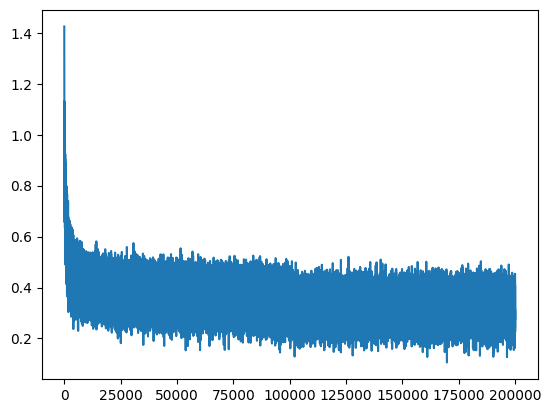

In [774]:
plt.plot(stepi, lossi)

In [ ]:
emb = C[Xtr] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1302, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xdev] # (32, 3, 10)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1690, grad_fn=<NllLossBackward0>)

In [777]:
# training split, dev/validation split, testing split
# 80% , 10%, 10%

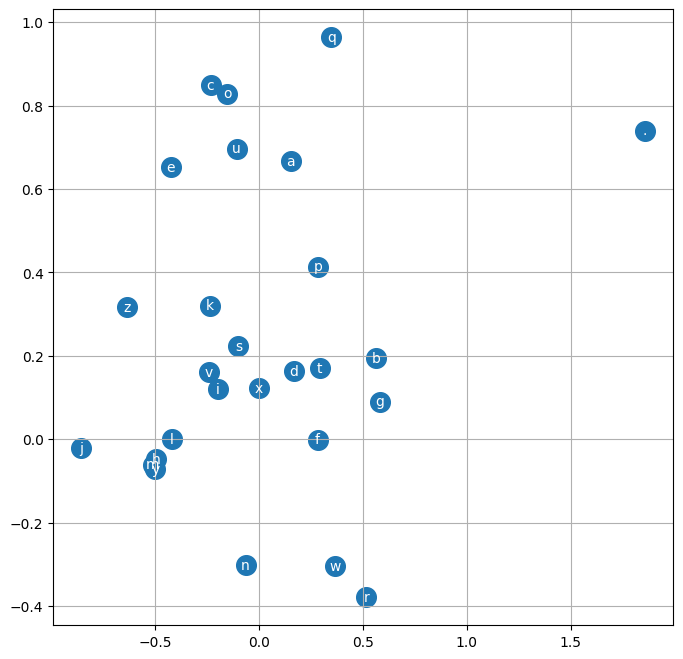

In [778]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [779]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carman.
amille.
khi.
milihentleena.
sane.
mahnen.
dellah.
jareei.
nellara.
chaiir.
kaleigh.
ham.
poin.
quint.
shonne.
livebu.
wajelo.
dearysi.
jace.
pilla.
